# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_file = '/content/drive/MyDrive/mit/projects/elective/SVHN_single_grey1.h5'

## **Importing the necessary libraries**

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os.path
data_file = os.path.abspath(os.getcwd() + "../../../../../../../data/data_science_mit/digit_recognition/SVHN_single_grey1.h5")
print(data_file)

d:\GitHub\amitprakash07\snowflake\data\data_science_mit\digit_recognition\SVHN_single_grey1.h5


**Let us check the version of tensorflow.**

In [3]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
h5py_file = h5py.File(data_file, 'r')

Check the number of images in the training and the testing dataset.

In [5]:
data_keys = list(h5py_file.keys())
print(data_keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [6]:
print(h5py_file.values())

ValuesViewHDF5(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)


In [7]:
h5py_file.items()

ItemsViewHDF5(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)

In [8]:
# Data information
class h5_utils:
  @staticmethod
  def show_items(name, obj):
      print(name)
      print(obj)

  @staticmethod
  def show_grp(grp_name):
    print(grp_name)

In [9]:
total_entry = 0
for key in data_keys:
  total_entry += h5py_file[key].shape[0]
  print(key, h5py_file[key].shape)
print("Total entries:", total_entry)

X_test (18000, 32, 32)
X_train (42000, 32, 32)
X_val (60000, 32, 32)
y_test (18000,)
y_train (42000,)
y_val (60000,)
Total entries: 240000


In [10]:
h5py_file.visit(h5_utils.show_grp)

X_test
X_train
X_val
y_test
y_train
y_val


In [11]:
h5py_file.visititems(h5_utils.show_items)

X_test
<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">
X_train
<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">
X_val
<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">
y_test
<HDF5 dataset "y_test": shape (18000,), type "|u1">
y_train
<HDF5 dataset "y_train": shape (42000,), type "|u1">
y_val
<HDF5 dataset "y_val": shape (60000,), type "|u1">


**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use ~~Y_train~~ y_train to print the first 10 labels.

In [12]:
X_train = h5py_file['X_train']
Y_train = h5py_file['y_train']

In [13]:
X_test = h5py_file['X_test']
Y_test = h5py_file['y_test']

In [14]:
X_train.shape

(42000, 32, 32)

In [15]:
# Utility class for svhn iamges
class svhn_image:
  @staticmethod
  def show_image(image_data: np.array, title: str):
    plt.imshow(image_data)
    plt.title(title)
    plt.show()

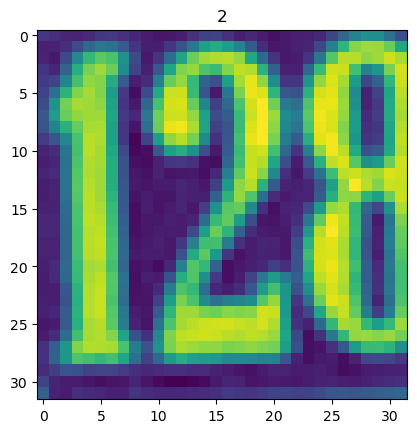

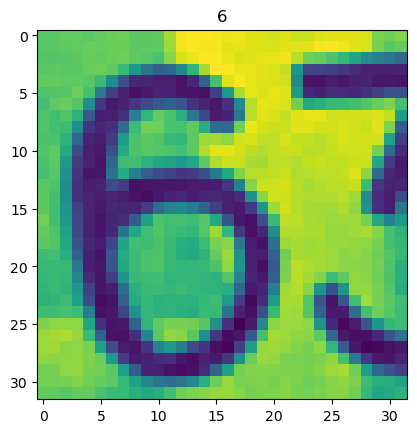

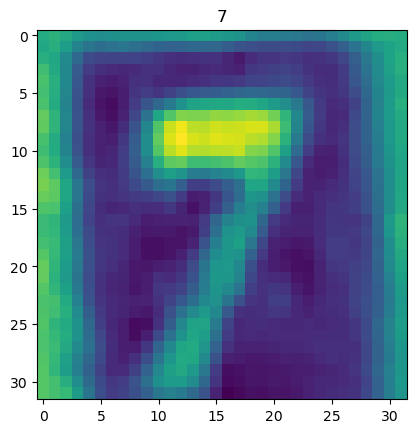

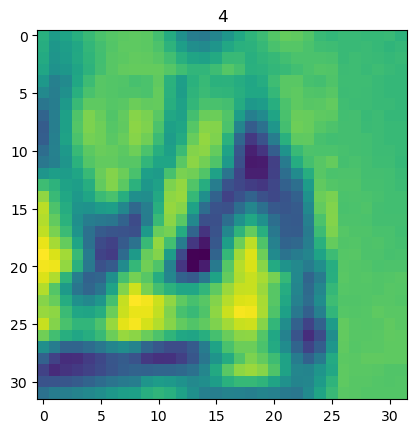

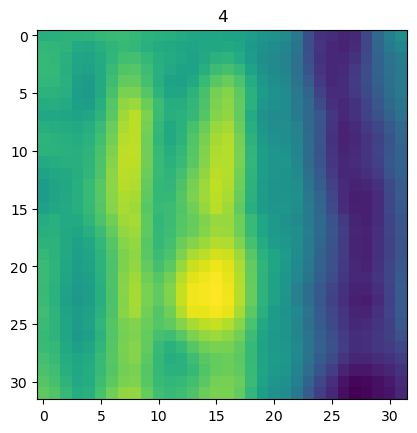

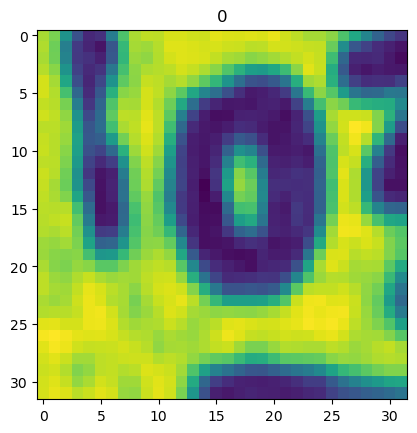

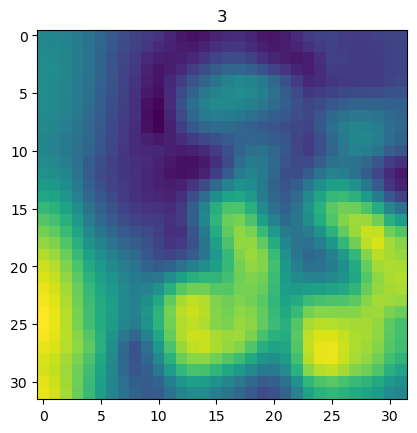

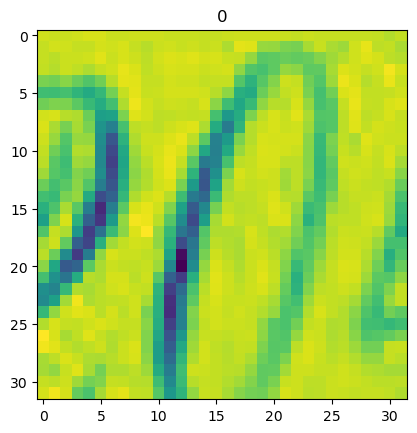

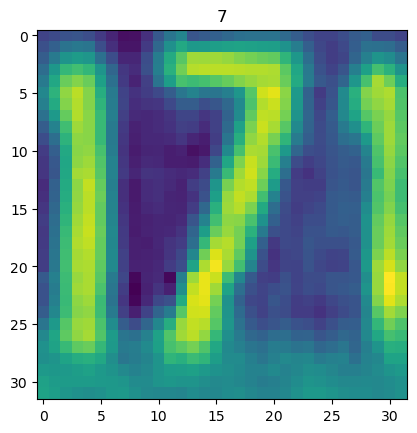

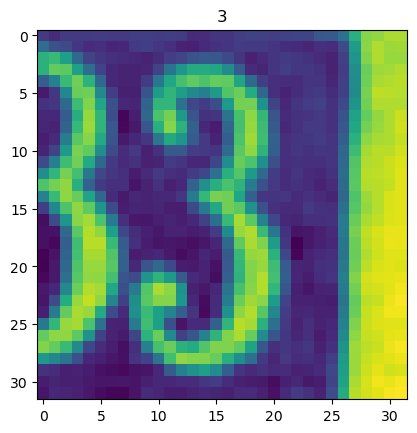

In [16]:
# Display the first 10 images of the training dataset with the title from the labeled data
for i in range(10):
  svhn_image.show_image(X_train[i], Y_train[i])

## **Data Observations**

*   There are six groups in the H5 formatted data among 3 groups contains images, and other 3 contains labels for each image data set
*  X_val, and Y_val are the subset of original SVINH data and splitted into training and test data in X_train, X_test respectively. Similarly the corresponding labeled data is also splitted in y_train and y_test datasets.




## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [17]:
print("Shape of the first image in the training dataset")
X_train[0].shape

Shape of the first image in the training dataset


(32, 32)

In [18]:
print("Image data of the first image in the traiing dataset")
X_train[0]

Image data of the first image in the traiing dataset


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

## Convert the H5 dataset to np array

In [19]:
# Let's first bring the data to np arrays
np_x_train = np.zeros(X_train.shape, dtype=np.float32)
np_x_test = np.zeros(X_test.shape, dtype=np.float32)

In [20]:
X_train.read_direct(np_x_train)
print(np_x_train[0])

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [21]:
print(np_x_train.shape)
print(np_x_test.shape)

(42000, 32, 32)
(18000, 32, 32)


### **Normalize the train and the test data**

In [22]:
np_x_train_normalized = np_x_train / 255
np_x_test_normalized = np_x_test / 255

Print the shapes of Training and Test data

In [23]:
print(np_x_train_normalized.shape)
print(np_x_test_normalized.shape)

(42000, 32, 32)
(18000, 32, 32)


### **One-hot encode output**

In [24]:
# Creating one-hot encoded representation of target labels

# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_train_encoded = tf.keras.utils.to_categorical(Y_train)
y_test_encoded = tf.keras.utils.to_categorical(Y_test)

In [25]:
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(42000, 10)
(18000, 10)


In [29]:
print(y_train_encoded[0])
print(Y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [31]:
np.random.seed(17)
import random
random.seed(17)
tf.random.set_seed(17)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

In [37]:
class TfKeraModel:
    def __init__(self, name):
        self.__name__ = name
        self.__onnx_file_name__ = ""        

    def export_to_onnx(self, file_name):
        print("Exporting to ONNX format")
        self.__onnx_file_name__ = file_name

    def display_model():
        print("Displaying Model")        


In [ ]:
# we have each image as input to a node, and each image
# size is 32 x 32 = 1024
class tfKeraModel_ANN(TfKeraModel):
    @staticmethod
    def nn_model_1()->tfKeraModel_ANN:
        model = tf.keras.models.Sequential()
        model.add(tf.keras.Input(shape=(1024,)))
        model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))
        return tfKeraModel_ANN(model)
    
    def __init__(self, seq_model:tf.keras.models.Sequential):
        self.__model__ = seq_model

    def compile(self):
        print('Compiling model')
        self.__model__.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics = [tf.keras.metrics.Accuracy],
                    loss = tf.keras.losses.CategoricalCrossentropy)
        print("Model Compiled")

    def summary(self):
        self.__model__.summary()

    def model(self)->tf.keras.models.Sequential:
        return self.__model__


In [122]:
nn_model_1_seq = tfKeraModel_ANN.nn_model_1()

In [123]:
nn_model_1_seq.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
nn_model_1_seq.compile()

Compiling model
Model Compiled


In [125]:
nn_model_1_seq.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

### **Build and train an ANN model as per the above mentioned architecture.**

In [126]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit
nn_model_1_seq.model().fit(x=X_train, 
                           y=Y_train, 
                           validation_split=0.2,
                           batch_size=128,
                           verbose='1',
                           epochs=20)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

**Final Observations:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

Check the number of images in the training and the testing dataset.

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

Normalize inputs from 0-255 to 0-1

Print New shape of Training and Test

### **One-hot encode the labels in the target variable y_train and y_test.**

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation Accuracies and Write your observations.**

**Observations:__________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation accuracies and write your observations.**

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**